In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium
import branca
import numpy as np
#!pip install folium branca

In [ ]:
# load the JSON file
with open("data (raw)/bikeshare/station_information.json", "r") as f:
    data = json.load(f)

# extract stations and convert to DataFrame
station_info_df = pd.DataFrame(data["data"]["stations"])

# display first rows in the notebook
station_info_df.head()

lat         lon                 name  capacity region_id station_id
0  38.269793  140.874203           04.ドコモ東北ビル        22         1   00000001
1  38.267867  140.871866              03.宮城県庁        14         1   00000002
2  38.268439  140.869813             02.仙台市役所         9         1   00000003
3  38.261325  140.867192  06.宮城ﾄﾖﾀ自動車MTG仙台広瀬通         6         1   00000004
4  38.262980  140.881010              08.AER前        16         1   00000005

In [ ]:
# Sort stations in descending order of capacity
station_capacity_sorted = station_info_df.sort_values(by="capacity", ascending=False)
station_capacity_sorted.head()




lat         lon               name  capacity region_id station_id
1720  35.651627  139.773103   B4-53.晴海五丁目ターミナル       102         2   00002361
4112  35.646857  139.808912  H1-38.辰巳駅西口自転車駐車場        87         4   00010206
4420  35.594544  139.760423  I1-38.ローソン 八潮三丁目店        84        10   00010623
4924  36.577185  136.647628     01.金沢駅(県立音楽堂横）        82         1   00089001
4136  35.710381  139.732137  E2-01.江戸川橋Ｂ自転車駐車場        74         6   00010234

In [ ]:
# Count how many stations exist for each capacity value
capacity_counts = station_info_df["capacity"].value_counts().sort_index(ascending=False)

# Display results
station_capacity_sorted.head()
capacity_counts

capacity
102      1
87       1
84       1
82       1
74       1
      ... 
4      529
3      523
2      272
1      157
0       59
Name: count, Length: 64, dtype: int64

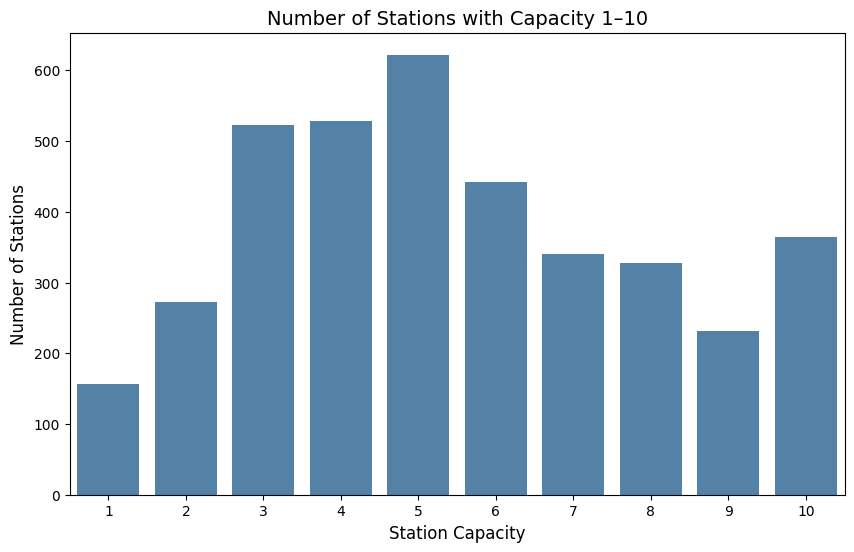

In [ ]:
# Filter stations with capacities 1 through 10
small_stations = station_info_df[station_info_df["capacity"].between(1, 10)]

# Count how many stations exist for each capacity
small_capacity_counts = small_stations["capacity"].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    x=small_capacity_counts.index,
    y=small_capacity_counts.values,
    color="steelblue"
)

plt.title("Number of Stations with Capacity 1–10", fontsize=14)
plt.xlabel("Station Capacity", fontsize=12)
plt.ylabel("Number of Stations", fontsize=12)
plt.xticks(rotation=0)
plt.show()


<module 'matplotlib.pyplot' from '/home/codespace/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

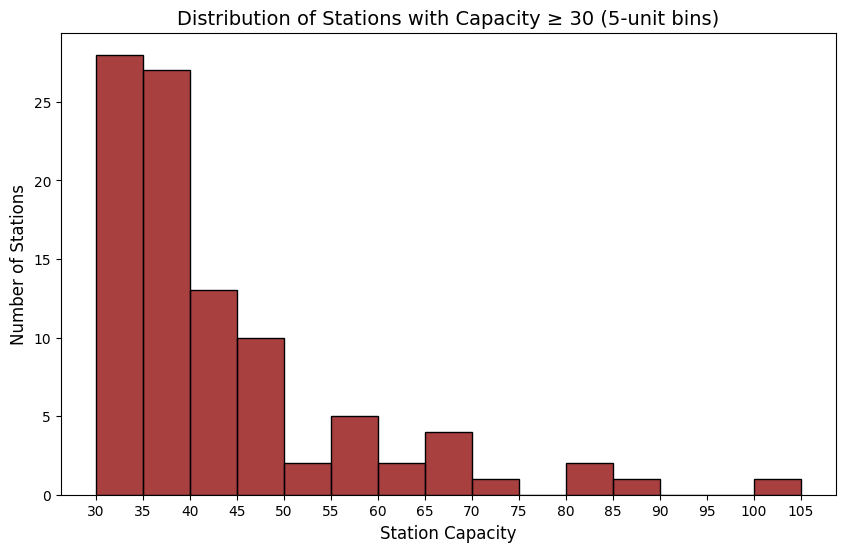

In [ ]:
import numpy as np

# Filter stations with capacity >= 30
very_large_stations = station_info_df[station_info_df["capacity"] >= 30]

# Define bins of size 5 starting at 30
max_capacity = very_large_stations["capacity"].max()
bins = np.arange(30, max_capacity + 5, 5)

plt.figure(figsize=(10,6))
sns.histplot(
    data=very_large_stations,
    x="capacity",
    bins=bins,
    color="darkred",
    edgecolor="black"
)

plt.title("Distribution of Stations with Capacity ≥ 30 (5-unit bins)", fontsize=14)
plt.xlabel("Station Capacity", fontsize=12)
plt.ylabel("Number of Stations", fontsize=12)
plt.xticks(bins)
plt



In [ ]:
# Count the number of stations in each region
region_counts = station_info_df["region_id"].value_counts()

# Sort in descending order
region_counts_sorted = region_counts.sort_values(ascending=False)

# Display the result
region_counts_sorted


region_id
1     2517
2      647
4      391
3      269
5      256
7      188
9      147
10     119
6       69
8       69
15      65
12      61
14      55
13      48
18      37
17      37
11      23
16       2
Name: count, dtype: int64

/tmp/ipykernel_2504/253282840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


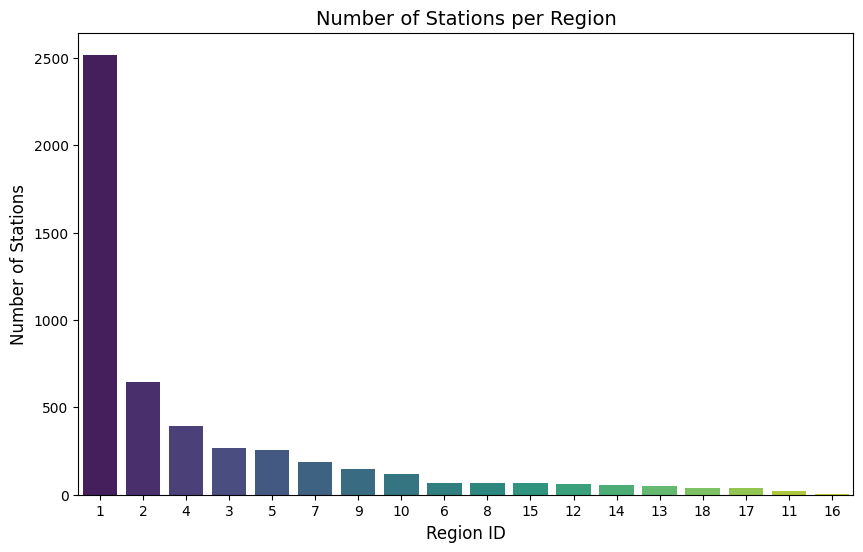

In [ ]:
# Count stations per region
region_counts = station_info_df["region_id"].value_counts().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    x=region_counts.index,
    y=region_counts.values,
    palette="viridis"
)

plt.title("Number of Stations per Region", fontsize=14)
plt.xlabel("Region ID", fontsize=12)
plt.ylabel("Number of Stations", fontsize=12)
plt.xticks
plt.show()


Next step: figure out what areas the region ids correspond with and see if there is a shapefile available.

In [ ]:
# import folium
# import branca
# import numpy as np
# import matplotlib.pyplot as plt

# # Use station_info_df already in memory
# df = station_info_df.copy()

# # Center map at mean location (Tokyo area)
# center = [df['lat'].mean(), df['lon'].mean()]

# # Get unique region ids and create a color map
# region_ids = sorted(df['region_id'].unique())
# n_regions = len(region_ids)

# # Choose a categorical colormap from matplotlib
# import matplotlib.cm as cm
# import matplotlib.colors as colors
# cmap = cm.get_cmap('tab20', max(1, n_regions))
# color_list = [colors.rgb2hex(cmap(i)) for i in range(n_regions)]
# region_to_color = {rid: color_list[i] for i, rid in enumerate(region_ids)}

# # Build folium map
# m = folium.Map(location=center, zoom_start=11, tiles='CartoDB positron')

# # Optional: MarkerCluster (uncomment import & code if you want clusters)
# from folium.plugins import MarkerCluster
# cluster = MarkerCluster()
# m.add_child(cluster)

# # Add stations as CircleMarkers (with popup)
# for _, row in df.iterrows():
#     rid = row['region_id']
#     color = region_to_color.get(rid, '#333333')
#     popup_html = (
#         f"<b>{row.get('name','')}</b><br>"
#         f"station_id: {row.get('station_id')}<br>"
#         f"capacity: {row.get('capacity')}<br>"
#         f"region_id: {rid}"
#     )
#     marker = folium.CircleMarker(
#         location=(row['lat'], row['lon']),
#         radius=6,
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.8,
#         weight=0.8,
#         popup=folium.Popup(popup_html, max_width=300)
#     )
#     # add to cluster for cleaner view at low zoom
#     cluster.add_child(marker)

# # Create a legend using branca colormap (categorical)
# legend_colors = [region_to_color[rid] for rid in region_ids]
# legend_labels = [str(rid) for rid in region_ids]

# colormap = branca.colormap.StepColormap(
#     colors=legend_colors,
#     index=list(range(len(legend_labels))),
#     vmin=0, vmax=len(legend_labels)-1,
#     caption='region_id (categorical)'
# )

# # The StepColormap will not show labels exactly as we want; instead create HTML legend
# legend_html = """
# <div style="
#     position: fixed;
#     bottom: 20px; left: 20px; width: 180px; height: auto;
#     z-index:9999; font-size:12px;
#     background: white; padding: 8px; border:2px solid grey;
# ">
# <b>region_id legend</b><br>
# """
# for rid in region_ids:
#     color = region_to_color[rid]
#     legend_html += f'<i style="background:{color};width:12px;height:12px;display:inline-block;margin-right:6px;"></i>{rid}<br>'
# legend_html += "</div>"
# m.get_root().html.add_child(folium.Element(legend_html))

# # Save to HTML file and display in notebook
# out_html = "tokyo_docomo_stations_by_region.html"
# m.save(out_html)
# m  # In Jupyter this will render the map inline


/tmp/ipykernel_2504/2389591960.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', max(1, n_regions))


In [27]:
# Load Meguro ward neighborhoods
meguro_gdf = gpd.read_file("data (raw)/boundaries/131105_tokyo_meguroku.geojson")

# Inspect first few rows
meguro_gdf.head()

# meguro_gdf.shape


KEY_CODE KEN_NAME GST_NAME CSS_NAME    MOJI  \
0  13110001001      東京都      目黒区     None   駒場１丁目   
1  13110001002      東京都      目黒区     None   駒場２丁目   
2  13110001003      東京都      目黒区     None   駒場３丁目   
3  13110001004      東京都      目黒区     None   駒場４丁目   
4  13110002001      東京都      目黒区     None  青葉台１丁目   

                                            geometry  
0  POLYGON ((139.68443 35.65582, 139.68294 35.655...  
1  POLYGON ((139.68294 35.65571, 139.68058 35.655...  
2  POLYGON ((139.69015 35.65766, 139.69058 35.657...  
3  POLYGON ((139.68054 35.65931, 139.67778 35.659...  
4  POLYGON ((139.69785 35.64638, 139.6973 35.6456...

In [25]:
# Check the CRS
print(meguro_gdf.crs)

# Check geometry types
print(meguro_gdf.geom_type.value_counts())

# Check column names
print(meguro_gdf.columns)

EPSG:4326
Polygon    88
Name: count, dtype: int64
Index(['KEY_CODE', 'KEN_NAME', 'GST_NAME', 'CSS_NAME', 'MOJI', 'geometry'], dtype='object')


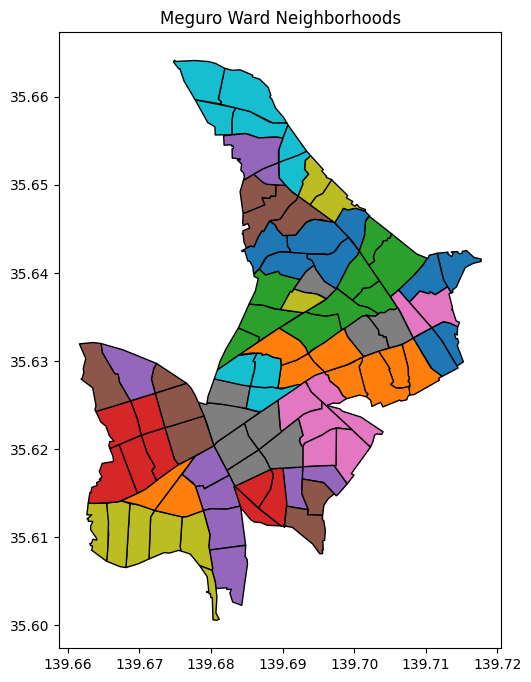

In [29]:
import matplotlib.pyplot as plt

meguro_gdf.plot(figsize=(8,8), edgecolor='black', column='MOJI', legend=False)
plt.title("Meguro Ward Neighborhoods")
plt.show()


In [30]:
# Convert stations to GeoDataFrame
stations_gdf = gpd.GeoDataFrame(
    station_info_df,
    geometry=gpd.points_from_xy(station_info_df.lon, station_info_df.lat),
    crs="EPSG:4326"
)

# Ensure same CRS
stations_gdf = stations_gdf.to_crs(meguro_gdf.crs)

# Spatial join to assign each station to a neighborhood
stations_with_neighborhood = gpd.sjoin(
    stations_gdf,
    meguro_gdf,
    how='left',
    predicate='within'
)

stations_with_neighborhood[['station_id', 'name', 'MOJI', 'GST_NAME']]


station_id                 name MOJI GST_NAME
0      00000001           04.ドコモ東北ビル  NaN      NaN
1      00000002              03.宮城県庁  NaN      NaN
2      00000003             02.仙台市役所  NaN      NaN
3      00000004  06.宮城ﾄﾖﾀ自動車MTG仙台広瀬通  NaN      NaN
4      00000005              08.AER前  NaN      NaN
...         ...                  ...  ...      ...
4995   00090006            06.おさかな通り  NaN      NaN
4996   00090007          07.きらめきみなと館  NaN      NaN
4997   00090008          08.敦賀赤レンガ倉庫  NaN      NaN
4998   00090009        09.人道の港敦賀ムゼウム  NaN      NaN
4999   00094001             嬬恋村観光案内所  NaN      NaN

[5001 rows x 4 columns]

After this we will only be looking at Meguro

In [31]:
# Keep only stations that fall within Meguro neighborhoods
stations_in_meguro = stations_with_neighborhood[stations_with_neighborhood['MOJI'].notna()]

# Inspect
stations_in_meguro[['station_id', 'name', 'MOJI', 'GST_NAME']].head()

# Optional: check how many remain
print(f"Number of stations in Meguro: {len(stations_in_meguro)}")


Number of stations in Meguro: 59


In [32]:
# Sort stations by capacity
stations_in_meguro_sorted = stations_in_meguro.sort_values(by="capacity", ascending=False)

# Inspect top stations
stations_in_meguro_sorted[['station_id', 'name', 'capacity', 'MOJI']].head()


station_id               name  capacity     MOJI
4468   00010689     J1-06.観音橋自転車置場        45   上目黒２丁目
4560   00010791    J1-14.二の橋自転車置場1        39    平町２丁目
4600   00010839        J1-23.清水池公園        23  目黒本町２丁目
129    00000158  J1-42.都立大学駅北口バス停前        20  柿の木坂１丁目
4470   00010691   J1-08.目黒区民センター公園        19    目黒２丁目

In [33]:
# Count how many stations exist for each capacity value
capacity_counts_meguro = stations_in_meguro['capacity'].value_counts().sort_index()

capacity_counts_meguro


capacity
1     1
2     2
3     5
4     6
5     4
6     3
7     7
8     1
9     2
10    6
11    4
13    2
14    3
15    2
16    1
17    3
18    1
19    2
20    1
23    1
39    1
45    1
Name: count, dtype: int64

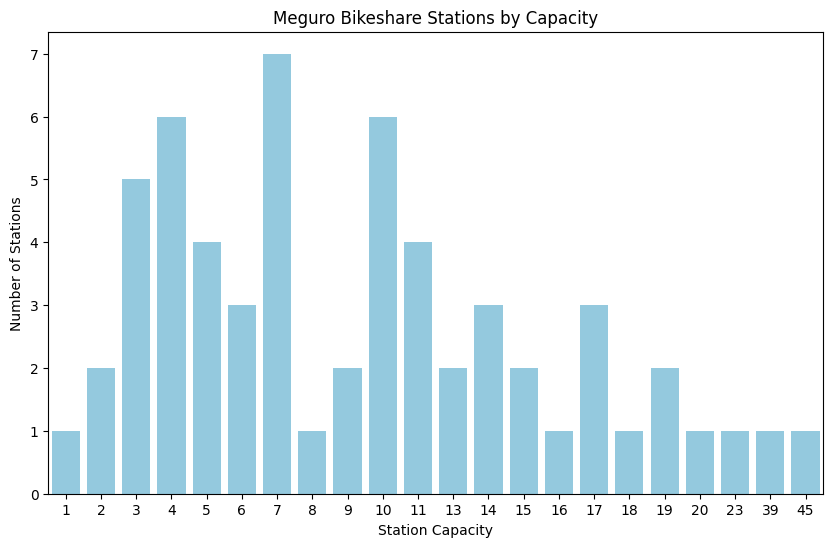

In [34]:
# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=capacity_counts_meguro.index, y=capacity_counts_meguro.values, color="skyblue")
plt.xlabel("Station Capacity")
plt.ylabel("Number of Stations")
plt.title("Meguro Bikeshare Stations by Capacity")
plt.xticks(rotation=0)
plt.show()

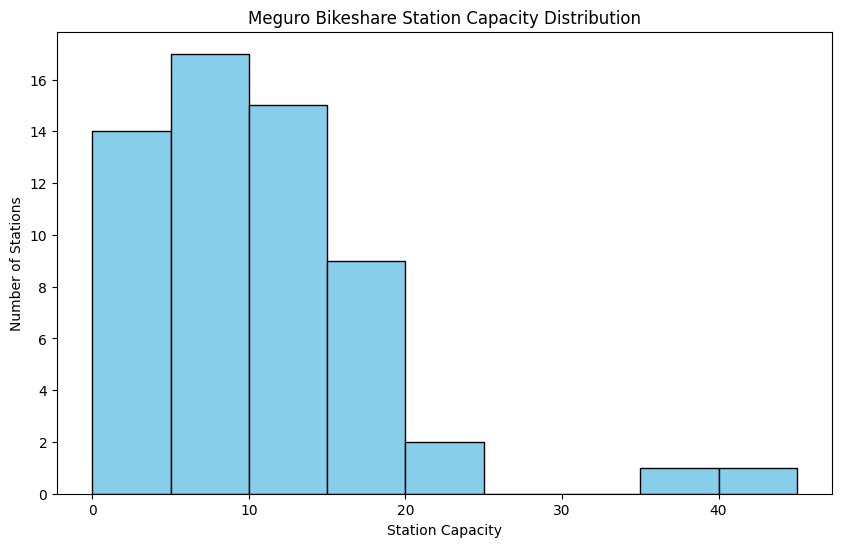

In [35]:
plt.figure(figsize=(10,6))
plt.hist(stations_in_meguro['capacity'], bins=range(0, max(stations_in_meguro['capacity']) + 5, 5), color="skyblue", edgecolor="black")
plt.xlabel("Station Capacity")
plt.ylabel("Number of Stations")
plt.title("Meguro Bikeshare Station Capacity Distribution")
plt.show()


<module 'matplotlib.pyplot' from '/home/codespace/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

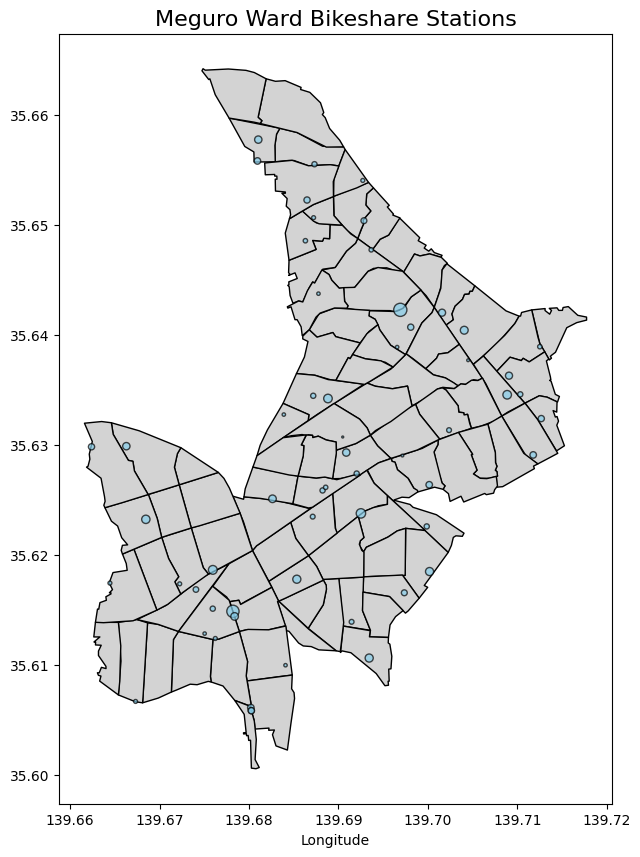

In [36]:

# Meguro neighborhoods GeoDataFrame
meguro_gdf = gpd.read_file("data (raw)/boundaries/131105_tokyo_meguroku.geojson")

# Stations within Meguro GeoDataFrame
stations_in_meguro = stations_with_neighborhood[stations_with_neighborhood['MOJI'].notna()]

# Ensure both layers have the same CRS
stations_in_meguro = stations_in_meguro.to_crs(meguro_gdf.crs)

# Plot the Meguro neighborhoods
fig, ax = plt.subplots(figsize=(10,10))
meguro_gdf.plot(ax=ax, edgecolor='black', color='lightgrey')

# Overlay stations
stations_in_meguro.plot(
    ax=ax,
    markersize=stations_in_meguro['capacity']*2,  # size proportional to capacity
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

# Add titles and labels
plt.title("Meguro Ward Bikeshare Stations", fontsize=16)
plt.xlabel("Longitude")
plt


In [38]:
# Center map roughly on Meguro
meguro_center = [stations_in_meguro.geometry.y.mean(), stations_in_meguro.geometry.x.mean()]
m = folium.Map(location=meguro_center, zoom_start=14, tiles='CartoDB positron')

# Optional: add neighborhood polygons
folium.GeoJson(
    meguro_gdf,
    name="Meguro neighborhoods",
    style_function=lambda x: {
        'fillColor': 'lightgrey',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.3
    }
).add_to(m)

# Add stations as individual circle markers (no clustering)
for idx, row in stations_in_meguro.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=row['capacity'] / 2,  # size proportional to capacity
        color='skyblue',
        fill=True,
        fill_color='skyblue',
        fill_opacity=0.7,
        popup=folium.Popup(f"<b>{row['name']}</b><br>Capacity: {row['capacity']}<br>Neighborhood: {row['MOJI']}", max_width=250)
    ).add_to(m)

# Show map
m

In [39]:
# Save map to HTML
m.save("meguro_bikeshare_map.html")
